In [1]:
import requests
import time
import json
import os

def get_article_revisions(title, older_than=None):
    """
    Fetches revisions for a given article.
    """
    url = f'https://api.wikimedia.org/core/v1/wikipedia/en/page/{title}/history'
    parameters = {}
    if older_than:
        parameters['older_than'] = older_than
    headers = {
        'User-Agent': 'WikiSandbox/ManagingBigData'  # Replace with your project and email
    }
    response = requests.get(url, headers=headers, params=parameters)
    if response.status_code != 200:
        raise Exception(f"Error fetching revisions for {title}: {response.status_code}")
    data = response.json()
    return data.get("revisions", [])

def loop_through_revisions(title, from_date=None, olderThanId=None):
    """
    Loops through revisions for an article until a specific timestamp is reached.
    """
    revisions = []
    while True:
        new_revisions = get_article_revisions(title, older_than=olderThanId)
        if not new_revisions:
            break
        revisions.extend(new_revisions)
        if new_revisions[-1]["timestamp"] <= from_date:
            break
        olderThanId = new_revisions[-1]["id"]
    print(f"Gathered {len(revisions)} revisions for article: {title}")
    return revisions

def get_revision_count(title):
    """
    Fetches the total revision count for an article.
    """
    url = f'https://api.wikimedia.org/core/v1/wikipedia/en/page/{title}/history/counts/edits'
    headers = {
        'User-Agent': 'WikiSandbox/ManagingBigData'  # Replace with your project and email
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        raise Exception(f"Error fetching revision count for {title}: {response.status_code}")
    return response.json()

def save_revisions_to_hdfs(revisions, filename):
    """
    Saves the revisions in an HDFS-compatible format (JSON Lines).
    """
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    with open(filename, "a", encoding="utf-8") as f:
        for revision in revisions:
            json.dump(revision, f, ensure_ascii=False)
            f.write("\n")  # Each revision is a separate JSON line





Fetching the top 100 articles on Wikipedia for 2024-05-01...


NameError: name 'get_most_popular_articles' is not defined

In [38]:
import requests
from tqdm import tqdm
import json

# read json file about revisions
def read_json_file(filename):
    with open(filename, "r", encoding="utf-8") as f:
        return [json.loads(line) for line in f]

jsonlist = read_json_file('hdfs_data/International_Workers_Day_revisions.jsonl')
idList = [obj['id'] for obj in jsonlist]
print(idList)

def compare_revisions(rev1, rev2):
    url = f'https://api.wikimedia.org/core/v1/wikipedia/en/revision/{rev2}/compare/{rev1}'
    headers = {
        'User-Agent': 'WikiSandbox/ManagingBigData'  # Replace with your project and email
    }
    response = requests.get(url, headers=headers)
    data = response.json()
    return data

def save_revision_content_to_json(data, rev1, rev2, title, date):
    for change in data['diff']:
        change['from_id'] = rev1
        change['to_id'] = rev2
        change['title'] = title
        change['date'] = date
        with open(f'hdfs_data/{title}_revision_content.json', 'a', encoding='utf-8') as f:
            json.dump(change, f, ensure_ascii=False)
            f.write('\n')

title = "International Workers' Day"
for i in tqdm(range(1, len(idList))):
    date = jsonlist[i]['timestamp']
    data = compare_revisions(str(idList[i-1]), str(idList[i]))
    save_revision_content_to_json(data, str(idList[i-1]), str(idList[i]), title, date)


[1265626085, 1261527387, 1261527204, 1261300431, 1259515939, 1258076332, 1257857717, 1256934333, 1252260219, 1251540717, 1248295339, 1248294653, 1248294037, 1243869722, 1243824793, 1243760013, 1243550351, 1243096041, 1243093690, 1243093590, 1240390279, 1238919332, 1238756831, 1237434604, 1237402957, 1233893260, 1233893216, 1233892932, 1233892851, 1233819385, 1232647813, 1227626241, 1225625371, 1224769281, 1224477361, 1224477254, 1222754762, 1222532735, 1222355183, 1222355078, 1222190914, 1222190681, 1222188262, 1222186796, 1222082285, 1222082139, 1222023610, 1222023210, 1222022994, 1221855531, 1221852361, 1221829970, 1221810707, 1221758356, 1221755708, 1221754021, 1221749753, 1221739266, 1221718779, 1221717501, 1221716353, 1221716128, 1221715851, 1221714777, 1221714726, 1221714198, 1221713083, 1221710953, 1221707828, 1221707460, 1221707008, 1221705172, 1221704757, 1221703077, 1221697254, 1221690738, 1221688634, 1221688471, 1221686988, 1221686929, 1221682294, 1221682214, 1221682163, 122

 12%|█▏        | 35/299 [00:23<02:54,  1.51it/s]


KeyboardInterrupt: 

In [ ]:
import requests

S = requests.Session()



# Get details of the revision for Adam Driver article
PARAMS_DRIVER = {
    "action": "query",
    "prop": "revisions",
    "titles": "Adam Driver",
    "rvprop": "timestamp|user|comment|content",
    "rvslots": "main",
    "rvlimit": "max",
    "formatversion": "2",
    "format": "json"
}

R_DRIVER = S.get(url="https://en.wikipedia.org/w/api.php", params=PARAMS_DRIVER)
DATA_DRIVER = R_DRIVER.json()

PAGES_DRIVER = DATA_DRIVER["query"]["pages"]

for page in PAGES_DRIVER:
    for revision in page["revisions"]:
        print(f"Timestamp: {revision['timestamp']}")
        print(f"User: {revision['user']}")
        print(f"Comment: {revision.get('comment', 'No comment')}")
        print(f"Content: {revision['slots']['main']['content']}")  # First 200 chars
        print("-" * 80)

Timestamp: 2025-01-13T20:26:23Z
User: TDFan1000
Comment: Not filming yet.
Content: {{short description|American actor (born 1983)}}
{{use American English|date=December 2020}}
{{use mdy dates|date=October 2022}}
{{Infobox person
| name               = Adam Driver
| image              = Star Wars- The Last Jedi Japan Premiere Red Carpet- Adam Driver (27163437599) (cropped).jpg
| caption            = Driver at the Tokyo premiere of ''[[Star Wars: The Last Jedi]]'' in 2017
| alt                = Adam Driver attending the Japan premiere of 'Star Wars: The Last Jedi' in 2017
| birth_name         = Adam Douglas Driver
| birth_date         = {{nowrap|{{birth date and age|1983|11|19}}}}
| birth_place        = [[Fontana, California]], U.S.
| alma_mater         = [[Juilliard School]] ([[Bachelor of Fine Arts|BFA]])
| occupation         = Actor
| years_active       = 2009–present
| spouse             = {{marriage|Joanne Tucker|2013}}
| children           = 2
| relations          = [[Henry Tucker 

KeyError: 'content'

In [8]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 36.1 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 45.0 MB/s eta 0:00:00
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)
Note: you may need to restart the kernel to use updated packages.


In [66]:
#read csv
import pandas as pd



<Axes: xlabel='date'>

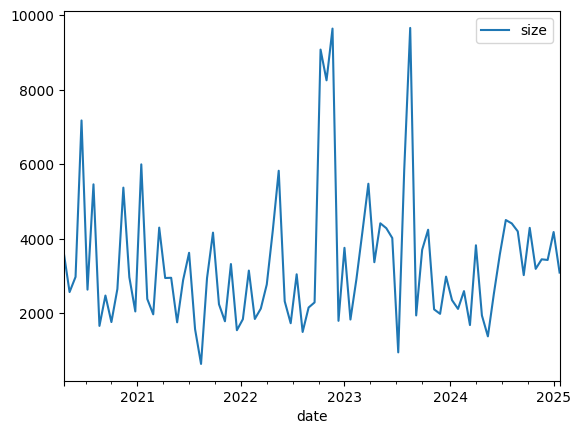

In [72]:
import matplotlib.pyplot as plt
#give headings to the columns
df = pd.read_csv('part-00000-c86eb653-4035-4ae4-a051-8fc5d060d4b2-c000.csv')
df.columns = ['size','id','date']
#print top 5 rows by size of the article
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'])

df = df.drop(columns=['id'])

df = df.resample('3W', on='date').mean()

df = df[df.index > '2020-04-01']

df.plot()




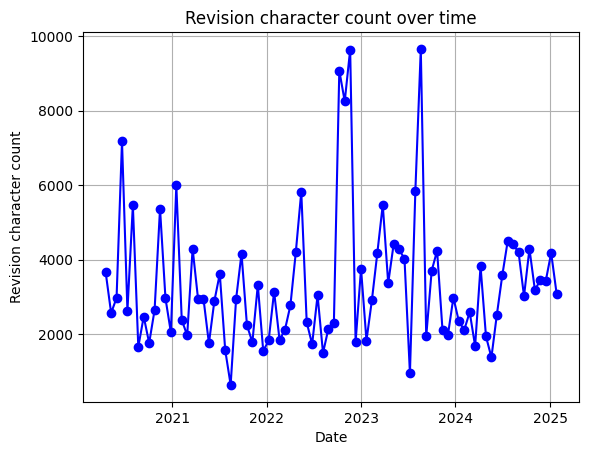

In [ ]:
import matplotlib.pyplot as plt
#plot on grid with x and y labels
plt.grid()
plt.xlabel('Date')
plt.ylabel('Revision character count')
plt.title('Revision character count over time')
#line graph with blue color and dots on the points
plt.plot(df.index, df['size'], 'bo-')
plt.show()










